# Kandinsky 3.0

Kandinsky 3.0 is an open-source text-to-image diffusion model built upon the Kandinsky2-x model family. In comparison to its predecessors, Kandinsky 3.0 incorporates more data and specifically related to Russian culture, which allows to generate pictures related to Russin culture. Furthermore, enhancements have been made to the text understanding and visual quality of the model, achieved by increasing the size of the text encoder and Diffusion U-Net models, respectively.

Source: https://huggingface.co/kandinsky-community/kandinsky-3

In [1]:
import platform

def is_mac():
    return platform.system() == "Darwin"

if is_mac():
    %pip install --pre torch --extra-index-url https://download.pytorch.org/whl/nightly/cpu
else:
    %pip install torch

%pip install diffusers
%pip install transformers accelerate
%pip install sentencepiece


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Setup model

In [2]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained(
    "kandinsky-community/kandinsky-3",
    variant="fp16",
    torch_dtype=torch.float16
)

if is_mac():
    print("Prepare pipe for MPS")
    import os
    os.environ["PYTORCH_MPS_HIGH_WATERMARK_RATIO"] = "0.0"
    pipe.to("mps")
    pipe.enable_attention_slicing()
else:
    print("Prepare pipe for CUDA")
    pipe.to("cuda")

/home/ubuntu/apps/kandinsky3/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]
text_encoder/config.json: 100%|██████████| 793/793 [00:00<00:00, 2.96MB/s]

tokenizer/added_tokens.json: 100%|██████████| 3.25k/3.25k [00:00<00:00, 964kB/s]
(…)ncoder/model.safetensors.index.fp16.json: 100%|██████████| 27.9k/27.9k [00:00<00:00, 17.0MB/s]
tokenizer/special_tokens_map.json: 100%|██████████| 2.54k/2.54k [00:00<00:00, 11.6MB/s]
tokenizer/tokenizer_config.json: 100%|██████████| 25.4k/25.4k [00:00<00:00, 27.5MB/s]

unet/config.json: 100%|██████████| 322/322 [00:00<0

Prepare pipe for CUDA


Generate image

In [19]:
prompt = "a cute monkey hanging from a tree, background full of fruits and leaves, realistic, colorful"
generator = torch.Generator(device="mps" if is_mac() else "cuda").manual_seed(345)
image = pipe(prompt, num_inference_steps=25, generator=generator).images[0]

 28%|██▊       | 7/25 [00:00<00:02,  7.06it/s]

100%|██████████| 25/25 [00:04<00:00,  5.46it/s]


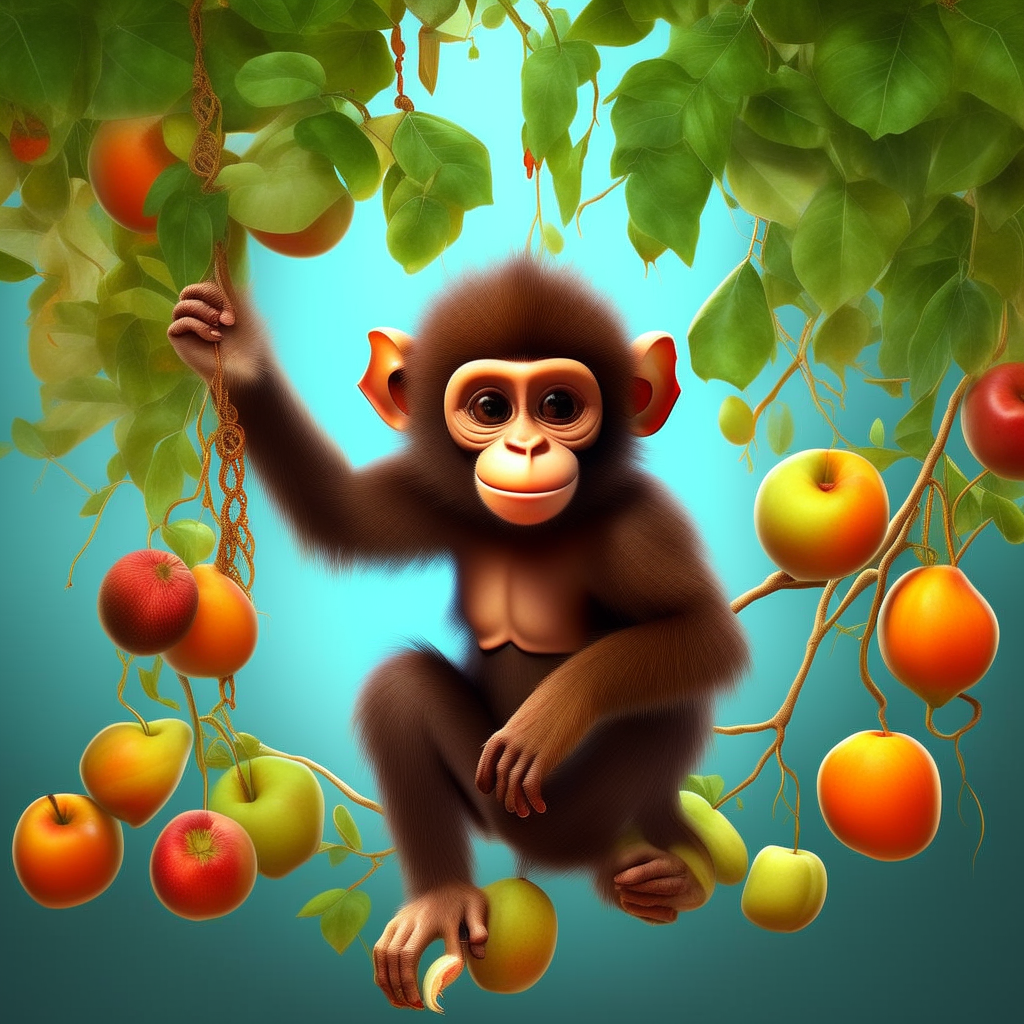

In [20]:
image